<a href="https://colab.research.google.com/github/dipali-solake/Machine-learning/blob/main/Yes_Bank_Stock_Closing_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
#####**Name**- Dipali Solake

# **Project Summary -**

Yes bank is a wellknown bank in india which provides wide range of services and solutions rights from bank accounts, deposits, cards, cash management privilage banking, not resident india banking(NRI), Institutional banking, marchant acquiring, digital banking and agricultural banking solutions. As the data is all about stock price. So in this project I will be analysing the patterns of the dataset by performing exploratopry data analysis and try to build a model with help of machine learning for predicting the closing stock price.

The tools for data analysis and model building in this project are packages from python library such as numpy, pandas, matplotlib, seaborn, linear regression, lasso, ridge, elasticnet, MinMaxScalar, etc.      

# **GitHub Link -**

https://github.com/dipali-solake

# **Problem Statement**


To develop a predictive model for forecasting the closing price of Yes Bank stock based on historical data and relevant features, enabling investors and stakeholders to make informed decisions regarding buying, selling, or holding Yes Bank shares.This dataset contains stock price information by monthly date.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNet)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error )
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')



<ipython-input-2-53a20ab8f76f>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drivr")

Mounted at /content/drivr


In [ ]:
df = pd.read_csv("/content/drivr/MyDrive/data_YesBank_StockPrices (1).csv")

### Dataset First View

In [ ]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(185, 5)

In [ ]:
rows=df.shape[0]
rows

185

In [ ]:
col=df.shape[1]
col

5

### Dataset Information

In [ ]:
# Datas(et Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

Dataset contain 185 rows abs5 columns with different variable types. There is no missing values as well as zero duplicates in dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1. Date - month and day information on which the information was recorded(Caregorical)
2. Open - Opening stock price (Numeric)
3. High - Highest stock price(numeric)
4. Low - lowest stock price (numeric)
5. Close - closing stock price (numeric)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for items in df.columns.tolist():
  print('The number of unique values in column', items, 'is', df[items].nunique())

The number of unique values in column Date is 185
The number of unique values in column Open is 183
The number of unique values in column High is 184
The number of unique values in column Low is 183
The number of unique values in column Close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df2 = df.copy()

In [ ]:
df2

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
# Write your code to make your dataset analysis ready.
df2['Date'] = pd.to_datetime(df2['Date'].apply(lambda x : datetime.strptime(x, '%b-%y')))

In [ ]:
df2.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

The given data has no missing values and duplicate values. the Date column was not arranged in proper format, I have changed the Date column in to the format Year-Month-Date that will be helpful to visualize the data.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
#**Univariate Analysis**

<Axes: xlabel='Close', ylabel='Density'>

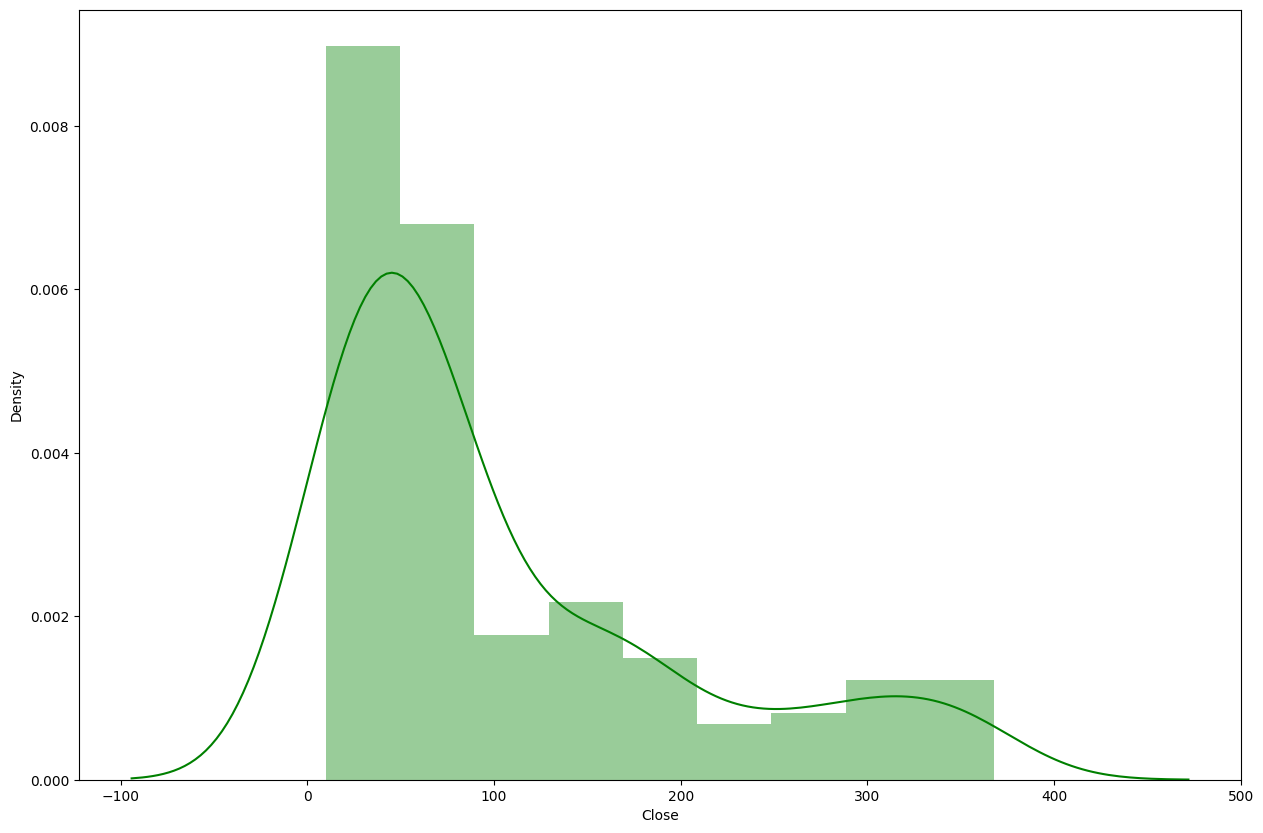

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,10))
sns.distplot(df2['Close'],color='g')

##### 1. Why did you pick the specific chart?

To see the distribution of closing price in the dataset I have used distplot as with the help of distplot I wiil be able to check the skewness of the data and according to that will be transformed to handle the skewness.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows that the 'close' column data is possitively skewed. So I have to transform this column data to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insights shows positive skewed distribution of close column. That will help me to understand and the methods to be applied to tackle the skewness of data.

#### Chart - 2

In [ ]:
numeric_features=df2.describe().columns

In [ ]:
numeric_features

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

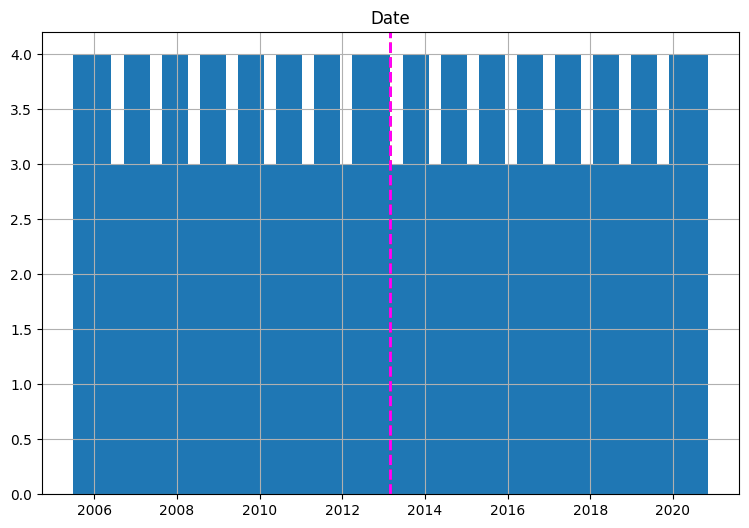

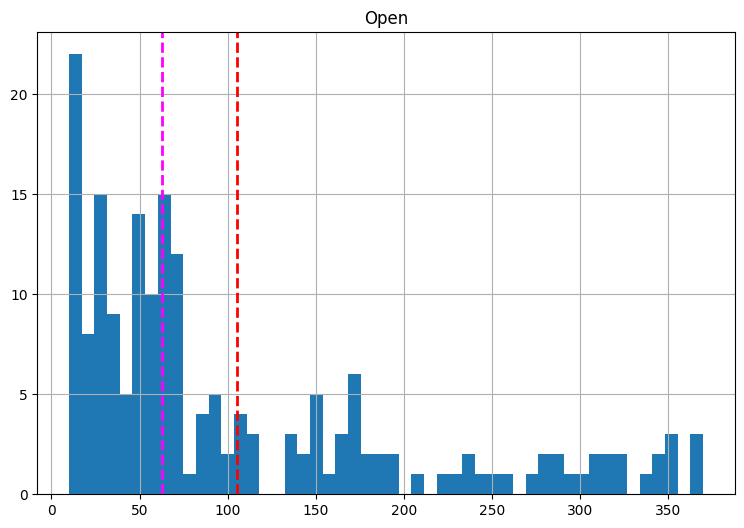

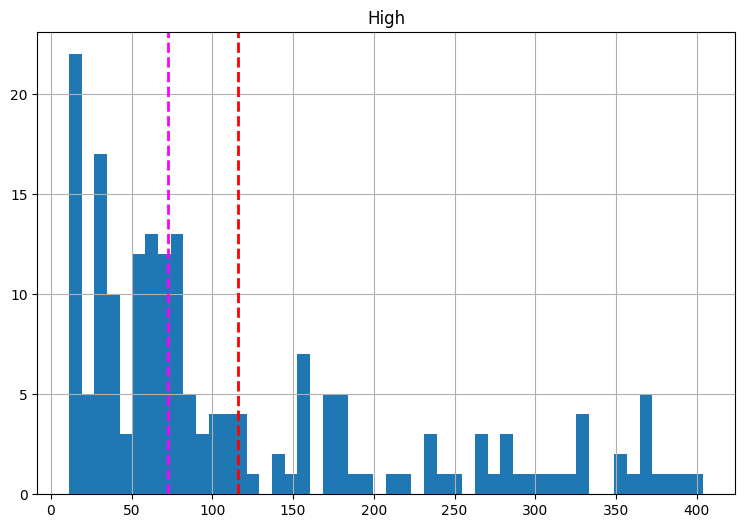

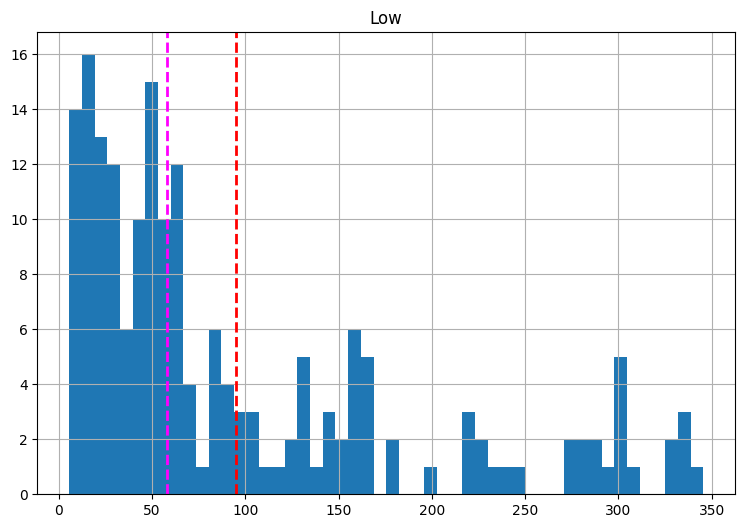

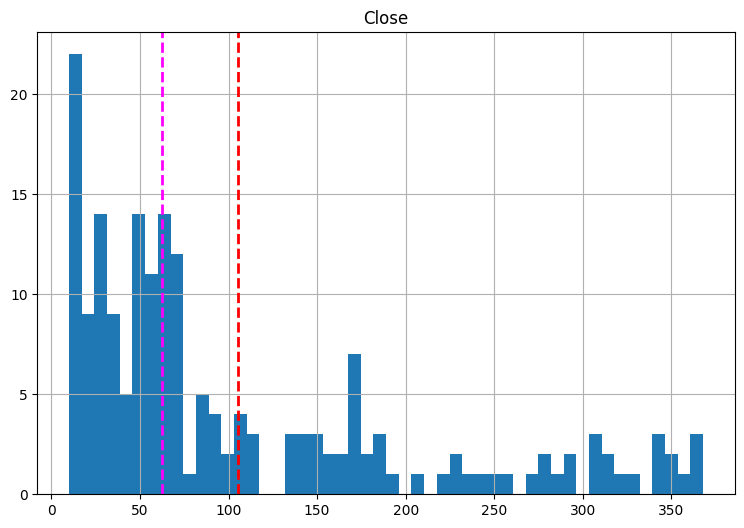

In [ ]:
# Chart - 2 visualization code
for col in numeric_features :
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=df2[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color='Red', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='magenta', linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()



##### 1. Why did you pick the specific chart?

As the histogram is very popular tool so that chart will show the overview of each and every variables information and gives clear idea about the data set. It also summarizes the measured data.

##### 2. What is/are the insight(s) found from the chart?

from the above chart it can be clearly seen that the numeric variables are possitively skewed. So I have to transform the columns data to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes ,the gain insights shows the positive skewed distribution of all numeric columns that will help me to understand and the methods to be applied to tackle the skewness of data.

#### Chart - 3

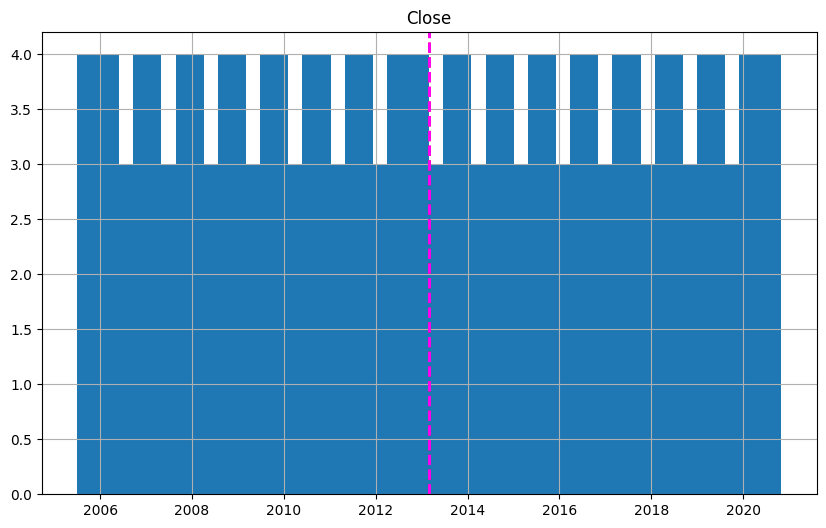

In [ ]:
# Chart - 3 visualization code
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
feature = df2["Date"]
feature.hist(bins = 50, ax = ax)
ax.axvline(feature.mean(),color='Red', linestyle='dashed',linewidth=2)
ax.axvline(feature.median(),color='magenta', linestyle='dashed',linewidth=2)
ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of Date column which is categorical in the dataset , here I used distplot.

##### 2. What is/are the insight(s) found from the chart?

As the dayte column has categorical information  and from the dist plot it is clear that the column date is equally distributed.



#### Chart - 4
**Bivariate Analysis**

In [ ]:
# Chart - 4 visualization code
ax = px.line(df2, df["Date"], df2['Close'], title="monthly closing price")
ax.update_layout(xaxis=dict(title='year'), yaxis=dict(title='closing price'))
ax.show()

##### 1. Why did you pick the specific chart?

Line charts are commonly used to display data trends over time or to show the relationship between two variables. They're effective because they emphasize the continuity of data points, making it easy to observe patterns, trends, and changes over time. Additionally, line charts are versatile and easy to understand, making them a popular choice for visualizing various types of data, from stock prices to temperature changes.

##### 2. What is/are the insight(s) found from the chart?

we can cleaarly see that the there stock price continuously increasing from 2014 to 2016

#### Chart - 5

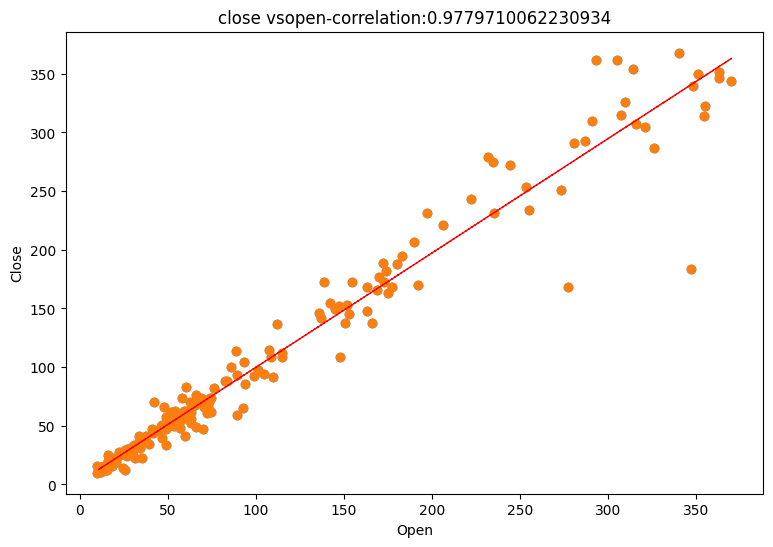

In [ ]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(9,6))
ax=fig.gca()
feature = df2['Open']
label = df2['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.scatter(x=feature, y=label)
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title('close vs' + 'open' + '-correlation:'+ str(correlation))
z = np.polyfit(df2['Open'], df2['Close'], 1)
y_hat=np.poly1d(z)(df2['Open'])
plt.plot(df2['Open'], y_hat, 'r--', lw = 1)
plt.show()

##### 1. Why did you pick the specific chart?


The above scatter plot shows the relationship between Oepn and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see thatthe open and close data are highly correlated therefore we can say that the closing price is very much dependant upon the opening price of data.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. the high corrrelation between the high and price indicates that high price will always play an important role in closing price.

#### Chart - 6

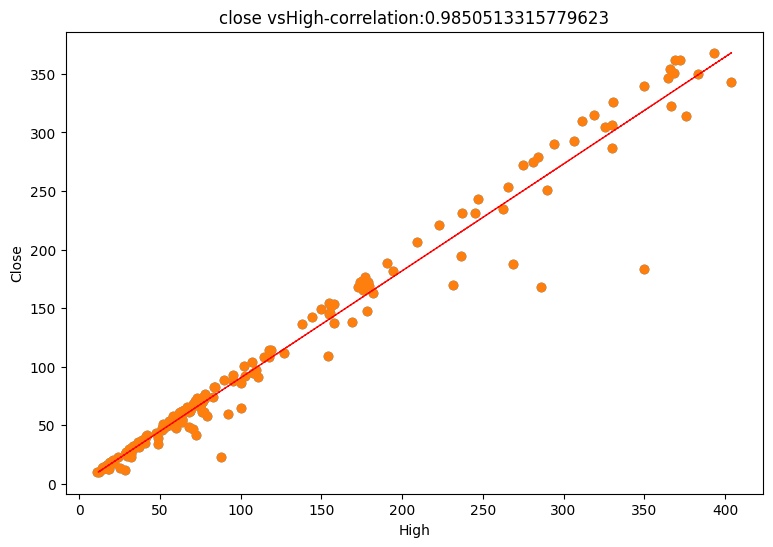

In [ ]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(9,6))
ax=fig.gca()
feature = df2['High']
label = df2['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.scatter(x=feature, y=label)
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title('close vs' + 'High' + '-correlation:'+ str(correlation))
z = np.polyfit(df2['High'], df2['Close'], 1)
y_hat=np.poly1d(z)(df2['High'])
plt.plot(df2['High'], y_hat, 'r--', lw = 1)
plt.show()

##### 1. Why did you pick the specific chart?


The above scatter plot shows the relationship between high and Close.

##### 2. What is/are the insight(s) found from the chart?

we can see the high and close columns are highly correlated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes. the high correlation between high and closing price indicates that the high price always plays an impottant role in closing price.



#### Chart - 7

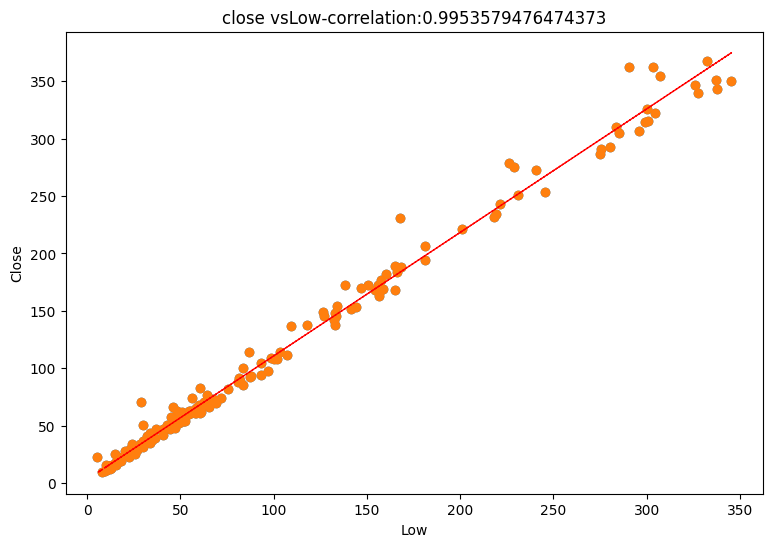

In [ ]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(9,6))
ax=fig.gca()
feature = df2['Low']
label = df2['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.scatter(x=feature, y=label)
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title('close vs' + 'Low' + '-correlation:'+ str(correlation))
z = np.polyfit(df2['Low'], df2['Close'], 1)
y_hat=np.poly1d(z)(df2['Low'])
plt.plot(df2['Low'], y_hat, 'r--', lw = 1)
plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relationship between high and Close.

##### 2. What is/are the insight(s) found from the chart?

we can see the low and close columns are highly correlated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes. the high correlation between low and closing price indicates that the low price always plays an impottant role in closing price.

---



#### Chart - 8

<Axes: >

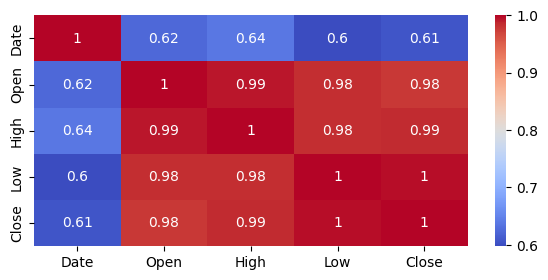

In [ ]:
# Chart - 8 visualization code
# Correlation Heatmap
plt.figure(figsize=(7,3))
sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm')

##### 1. Why did you pick the specific chart?

Heatmaps are graphical representations of data where values in a matrix are represented as colors. They are commonly used to visualize data in various fields like data analysis, biology, finance, and more. Heatmaps help identify patterns, trends, and anomalies in large datasets by highlighting areas with higher or lower values.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that each and every feature is highly correlated to each other. As the linear regression assumes that there is no multicollinearity ,Therfore we will try to reduce multicolinearity using transformation of variables and generating new features.

#### Chart - 9
**Pair plot**

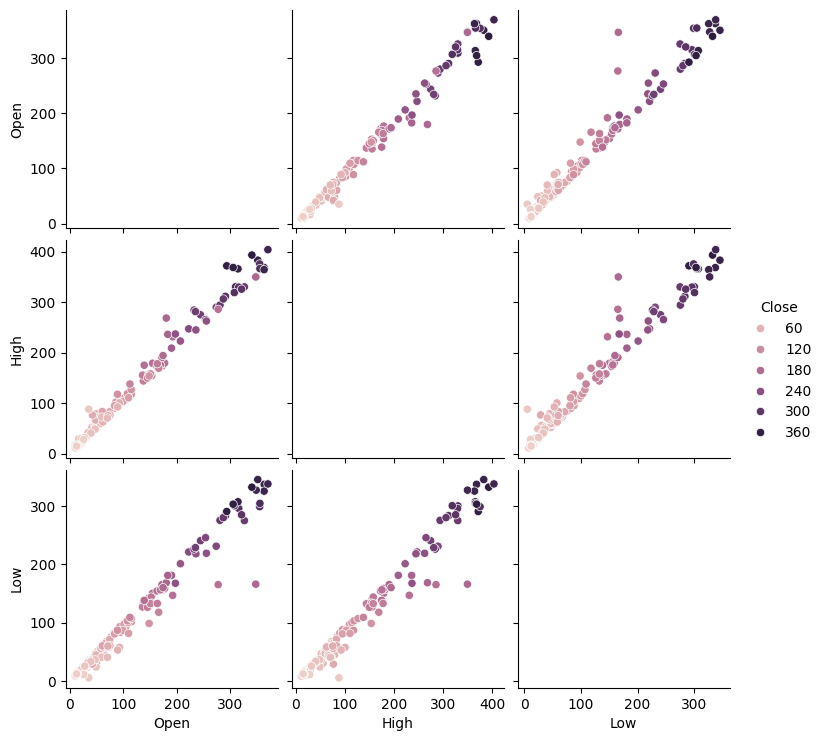

In [ ]:
# Chart - 9 visualization code
# PAIR PLOT
sns.pairplot(df2, hue = 'Close')

##### 1. Why did you pick the specific chart?

A pairplot is a powerful visualization tool provided by libraries like Seaborn in Python. It creates a grid of scatterplots and histograms for multiple variables in a dataset, allowing you to quickly visualize relationships and distributions between them. It's great for exploring pairwise relationships in small to medium-sized datasets.

##### 2. What is/are the insight(s) found from the chart?

As I use close in the hue variable, above plot will show thedistribution of close with different variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df2.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing values in dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
fig = px.box(df2['Open'])
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

In [ ]:
fig = px.box(np.log10(df2['Open']), title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig = px.box(df2['High'])
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

In [ ]:
fig = px.box(np.log10(df2['High']), title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig = px.box(df2['Low'])
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

In [ ]:
fig = px.box(np.log10(df2['High']), title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

<Axes: xlabel='Close', ylabel='Density'>

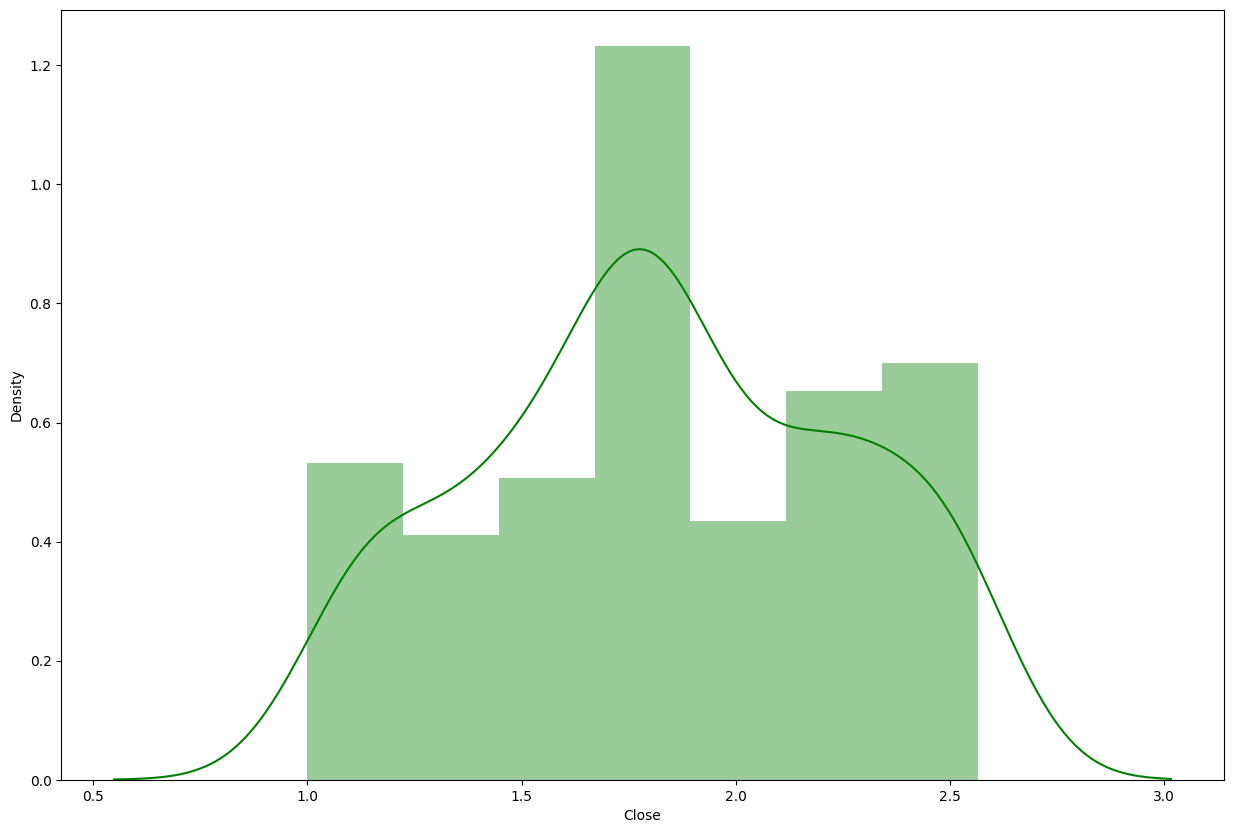

In [ ]:
# Dependant variable price
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df2['Close']),color='g')

In [ ]:
df2.set_index('Date', inplace=True)

In [ ]:
# generating a new feature to tackle the high multicolineatity.
df2['average'] = df2[['Open', 'High', 'Low']].mean(axis=1).round(2)

In [ ]:
df2.head(10)

,Open,High,Low,Close,average
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75
2005-08-01,12.58,14.88,12.55,13.42,13.34
2005-09-01,13.48,14.87,12.27,13.30,13.54
2005-10-01,13.20,14.47,12.40,12.99,13.36
2005-11-01,13.35,13.88,12.88,13.41,13.37
2005-12-01,13.49,14.44,13.00,13.71,13.64
2006-01-01,13.68,17.16,13.58,15.33,14.81
2006-02-01,15.50,16.97,15.40,16.12,15.96
2006-03-01,16.20,20.95,16.02,20.08,17.72


In [ ]:
dependant_variable = 'Close'

In [ ]:
independent_variable = list(set(df2.columns.tolist())-{dependant_variable})

In [ ]:
x = np.log10(df2[independent_variable]).values

In [ ]:
y = np.log10(df2[dependant_variable]).values

##### What all outlier treatment techniques have you used and why did you use those techniques?

There were 3 independant features that had outliers shown in the above boxplot. So to handle the outliers as well as to tackle the skewness of the data I have transformed all the numeric featuresto log to base 10 values.

After the conversion of numeric features I again visualized them through the boxplot to show zero outliers.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

  #calculating vif
  vif=pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]

  return(vif)


In [ ]:
calc_vif(df2[[i for i in df2.describe().columns]])

,variables,VIF
0,Open,3.341628e+08
1,High,3.960572e+08
2,Low,2.770299e+08
3,Close,4.284194e+02
4,average,2.993476e+09


### 5. Data Transformation

In [ ]:
# Transform Your data
x = np.log10(df2[independent_variable]).values
y = np.log10(df2[dependant_variable]).values

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, The data are needed to be transformed. It has been already seen that all the independant variables and target variables are positive skewed and they also have outliers. So to tackle both the problem I have used log 10 transformation.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

##### What data splitting ratio have you used and why?

Here, I have used the most common or standard splitting of the dataset which is 80/20. 80% of the dataset is to train is to train the algorithm and 20% is for test.

### 6. Data Scaling

In [ ]:
# Scaling your data
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

##### Which method have you used to scale you data and why?

Here, I have used the minmaxscalar method to scale the data since aall the independant variables are not normally distributed. So to make sure every independant variables contribute almost equally to the analysis the minmaxscalar method is used

## ***7. ML Model Implementation***

### ML Model - 1
**linear regression**

In [ ]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(x_train, y_train)


LinearRegression()

In [ ]:
regressor.intercept_

0.9797572199457665

In [ ]:
regressor.coef_

array([ 0.90459122,  0.31613169, -1.46550815,  1.8295131 ])

In [ ]:
y_pred_train = regressor.predict(x_train)
#predicting the result
y_pred = regressor.predict(x_test)

In [ ]:
y_train

array([2.18912521, 1.30276371, 1.81130684, 1.61752453, 1.18892848,
       1.75966784, 1.70731463, 1.57898284, 1.70363524, 1.07736791,
       1.9330315 , 1.11892575, 1.53844805, 1.45682135, 2.51340407,
       1.86605092, 2.54955498, 1.4034637 , 1.67495295, 1.7363965 ,
       2.50819293, 1.08849047, 2.05648559, 1.52517443, 2.0581602 ,
       1.77451697, 2.53932706, 1.83142182, 1.98896007, 2.16411482,
       1.63828954, 1.96773513, 2.03494915, 2.17429246, 1.15745677,
       2.00121433, 1.84695533, 1.12385164, 1.73102438, 1.86934908,
       2.27584094, 1.01114736, 1.25599573, 2.0187421 , 1.7451529 ,
       1.42894429, 2.03622954, 2.24679392, 2.13618133, 1.68708284,
       2.54406804, 1.44638181, 1.61267792, 2.18132899, 1.96473092,
       1.78682238, 2.31468865, 1.17695898, 1.7854722 , 1.52439612,
       1.50419892, 1.81934648, 1.25139485, 2.46323583, 1.55606116,
       1.16643011, 2.13956427, 1.44932409, 1.35755372, 1.81947813,
       1.91750551, 1.70389295, 1.86770313, 1.73631681, 1.11360

In [ ]:
y_pred

array([1.4923911 , 2.14805936, 1.66188379, 2.14969445, 1.82574095,
       1.50808261, 2.36594461, 1.2267379 , 1.14805807, 2.34435985,
       2.47726939, 1.94425469, 2.18459158, 1.76981107, 2.53179597,
       2.42427508, 1.86780302, 1.44681118, 2.42593087, 1.70693503,
       0.96961156, 2.07433412, 2.17187189, 1.77411331, 2.33861575,
       1.69564443, 2.40140144, 1.13603302, 2.03325749, 1.72217345,
       2.57000081, 2.54424413, 1.86850165, 2.22427412, 1.59443763,
       1.6805872 , 2.41726416])

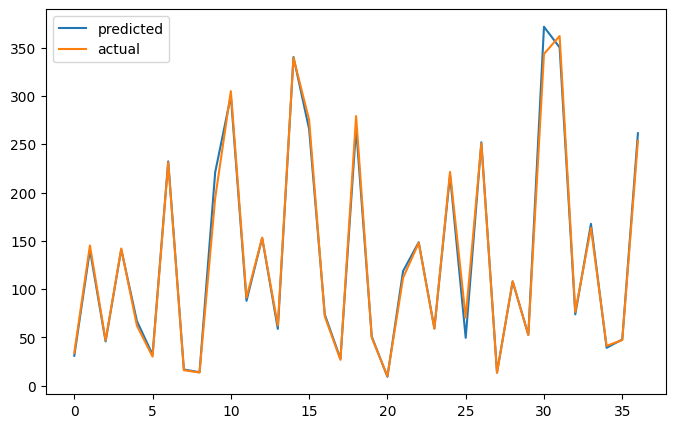

In [ ]:
# VISUALIZE THE COMPARISON BETWEEN ACTUAL VALUES AND PREDICTED VALUES
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(['predicted', 'actual'])
plt.show()

In [ ]:
fig = px.scatter(x=10**(y_test), y=10**(y_pred),labels={'x':'Actaual values', 'y':'prediction'})
fig.add_shape(type='line',line=dict(dash='dash'),x0=y.min(),x1=y.max(),y1=y.max())
fig.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
lr_mse = mean_squared_error(10**(y_test), 10**(y_pred))
lr_mse

69.92976518274887

In [ ]:
mse_train =mean_squared_error(10**(y_train),10**(y_pred_train))
mse_train

44.40573158904346

In [ ]:
# train performance
lr_rmse = np.sqrt(mse_train)
lr_rmse

6.6637625699782745

In [ ]:
lr_mae = mean_absolute_error(10**(y_test),10**(y_pred))
lr_mae

4.746993623524985

In [ ]:
mean_absolute_percentage_error(10**(y_train),10**(y_pred_train))

0.047096255036487504

In [ ]:
lr_mape=mean_absolute_percentage_error(10**(y_test),10**(y_pred))
lr_mape

0.04150972376706615

In [ ]:
r2_score(y_train, y_pred_train)

0.9951721981228238

In [ ]:
# test performance
lr_r2_score = r2_score(y_test,y_pred)
lr_r2_score

0.9946673148333343

In [ ]:
metrics_score = pd.DataFrame({'mean squared error':[lr_mse],'root mean squared error':[lr_rmse],'mean absolute error':[lr_mae],'mean absolute percentage error':[lr_mape]})

In [ ]:
metrics_score

,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error
0,69.929765,6.663763,4.746994,0.04151


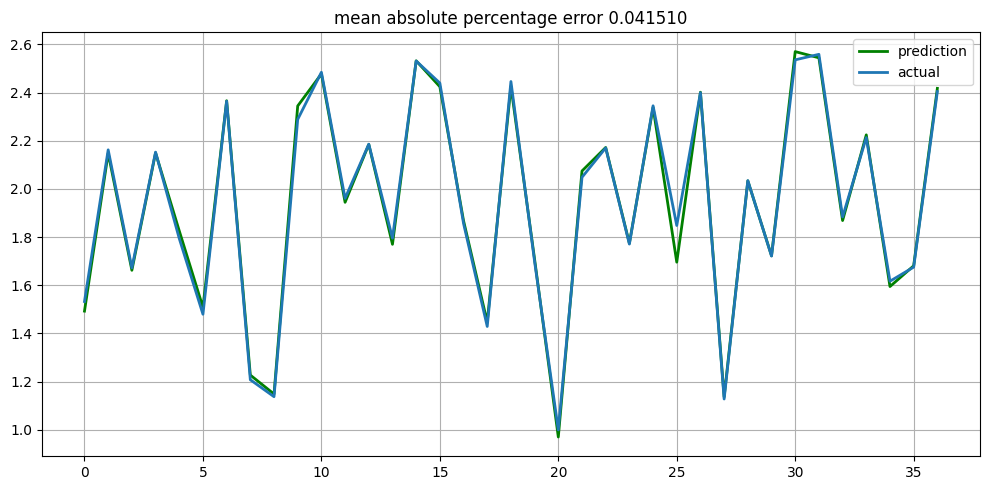

In [ ]:
# function to plot model performance
def plotmodelresult(model, x_train=x_train, x_test=x_test, plot_intervals=False):

  # plot model vs fact values

   prediction = model.predict(x_test)

   plt.figure(figsize=(10,5))
   plt.plot(prediction, 'g', label='prediction', linewidth=2.0)
   plt.plot(y_test,label='actual',linewidth=2.0)

   plt.title('mean absolute percentage error {0:2f}'.format(lr_mape))
   plt.legend(loc='best')
   plt.tight_layout()
   plt.grid(True);

plotmodelresult(regressor, plot_intervals=True)


### ML Model - 2

#### Ridge regression with cross validation

In [ ]:
# Visualizing evaluation Metric Score chart
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge,parameters, scoring='neg_mean_squared_error',cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
print('The best fit alpha value is found out to be :',ridge_regressor.best_params_)
print('\nUsing', ridge_regressor.best_params_,'the negative mean squared error is :',ridge_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.01}

Using {'alpha': 0.01} the negative mean squared error is : -0.0011773450928997877


In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)
y_pred_ridge

array([1.49497405, 2.14885571, 1.67959522, 2.14515702, 1.82041642,
       1.5033444 , 2.36409877, 1.21975906, 1.14268177, 2.34060261,
       2.4776548 , 1.95289768, 2.18105758, 1.76853582, 2.52868016,
       2.42119101, 1.86349297, 1.44148176, 2.42297031, 1.70850826,
       0.97356231, 2.07243188, 2.17737697, 1.76868982, 2.33427424,
       1.69801724, 2.40504124, 1.12999633, 2.03120817, 1.72809578,
       2.56998041, 2.54062498, 1.86455564, 2.22417362, 1.59142813,
       1.67901578, 2.41282407])

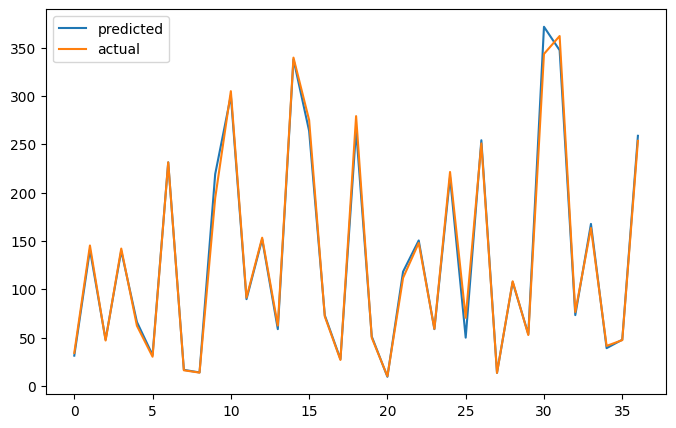

In [ ]:
# comparison between actual values and predicted values
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
r_mse = mean_squared_error(10**(y_test),10**(y_pred_ridge))
print('mse :',r_mse)

mse : 70.90780796564509


In [ ]:
r_rmse = np.sqrt(r_mse)
print('rmse:',r_rmse)

rmse: 8.420677405389966


In [ ]:
r_r2=r2_score(10**(y_test),10**(y_pred_ridge))
r_r2

0.9937003889249276

In [ ]:
r_mae = mean_absolute_error(10**(y_test),10**(y_pred_ridge))
r_mae

4.9311694090787475

In [ ]:
r_mape = mean_absolute_percentage_error(10**(y_test),10**(y_pred))
r_mape

0.04150972376706615

In [ ]:
metrics_score_ridge= pd.DataFrame({'mean squared error':[r_mse],'root mean squared error':[r_rmse],'mean absolute error':[r_mae],'mean absolute percentage error':[r_mape]})

In [ ]:
metrics_score_ridge

,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error
0,70.907808,8.420677,4.931169,0.04151


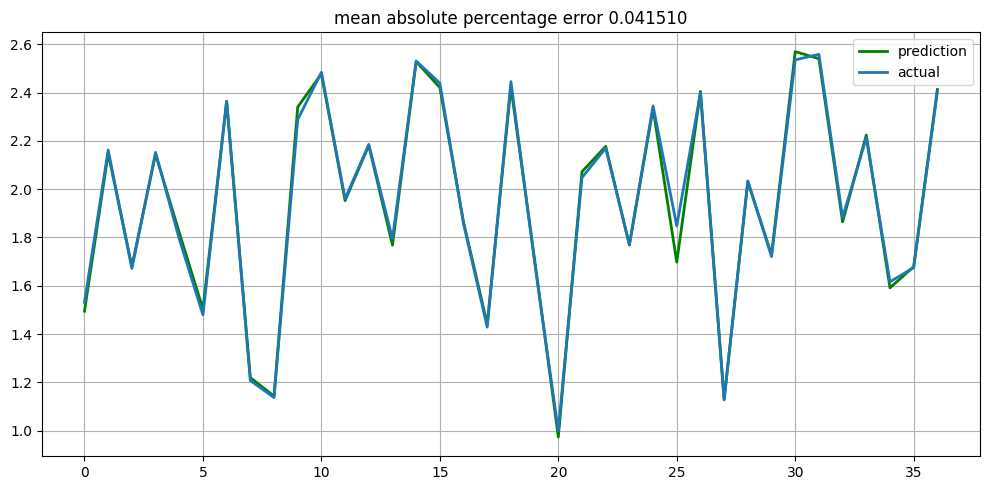

In [ ]:
# function to plot model performance
def plotmodelresult(model, x_train=x_train, x_test=x_test, plot_intervals=False):

  # plot model vs fact values

   prediction = model.predict(x_test)

   plt.figure(figsize=(10,5))
   plt.plot(prediction, 'g', label='prediction', linewidth=2.0)
   plt.plot(y_test,label='actual',linewidth=2.0)

   plt.title('mean absolute percentage error {0:2f}'.format(lr_mape))
   plt.legend(loc='best')
   plt.tight_layout()
   plt.grid(True);

plotmodelresult(ridge_regressor, plot_intervals=True)

In [ ]:
# check for homoscadacity
fig = px.scatter(x=10**(y_test), y=10**(y_pred_ridge),labels={'x':'Actaual values', 'y':'prediction'})
fig.add_shape(type='line',line=dict(dash='dash'),x0=y.min(),x1=y.max(),y1=y.max())
fig.show()

### ML Model - 3
**Lsso regression with cross validation**

In [ ]:
# ML Model - 3 Implementation
lasso = Lasso(alpha = 0.1, max_iter = 3000)

# Fit the Algorithm
lasso.fit(x_train,y_train)



Lasso(alpha=0.1, max_iter=3000)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
lasso.score(x_train, y_train)

0.24239155193667772

In [ ]:
y_pred_l = lasso.predict(x_test)

In [ ]:
mse = mean_squared_error(10**(y_test),10**(y_pred_l))
print('mse :',mse)

mae = mean_absolute_error(10**(y_test),10**(y_pred_l))
print('mae:',mae)

rmse = np.sqrt(mse)
print('rmse:',rmse)

mape = mean_absolute_percentage_error(10**(y_test),10**(y_pred_l))
print('mape:',mape)

r2= r2_score(10**(y_test),10**(y_pred_l))
print('r2 :',r2)

mse : 14034.988948250462
mae: 82.57480570251505
rmse: 118.46935868928497
mape: 0.7547254629560559
r2 : -0.24690036758368716


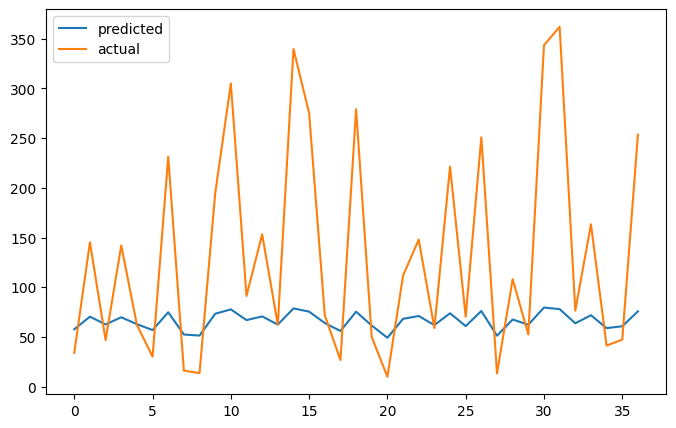

In [ ]:
# function to plot model performance
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_l))
plt.plot(10**(np.array(y_test)))
plt.legend(['predicted','actual'])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=3)

# Fit the Algorithm
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print('The best fit alpha value is found out to be :',lasso_regressor.best_params_)
print('\nUsing', lasso_regressor.best_params_,'the negative mean squared error is :',lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using {'alpha': 1e-15} the negative mean squared error is : -0.0011984680768812388


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

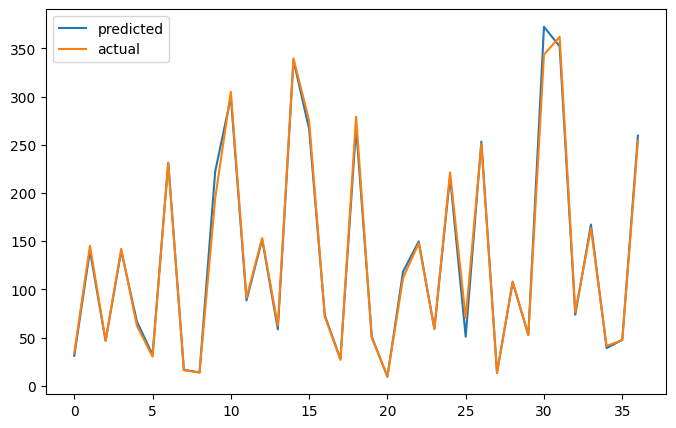

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
l_mse = mean_squared_error(10**(y_test),10**(y_pred_lasso))
print('mse :',l_mse)

l_mae = mean_absolute_error(10**(y_test),10**(y_pred_lasso))
print('mae:',l_mae)

l_rmse = np.sqrt(l_mse)
print('rmse:',l_rmse)

l_mape = mean_absolute_percentage_error(10**(y_test),10**(y_pred_lasso))
print('mape:',l_mape)

l_r2 = r2_score(10**(y_test),10**(y_pred_lasso))
print('r2 :',l_r2)

mse : 69.31913882030766
mae: 4.729049907539072
rmse: 8.325811601297957
mape: 0.039410633418468344
r2 : 0.9938415299082654


In [ ]:
# visualizing the evaluation metrics chart
metrics_score_lasso= pd.DataFrame({'mean squared error':[mse],'root mean squared error':[rmse],'mean absolute error':[mae],'mean absolute percentage error':[mape]})

In [ ]:
metrics_score_lasso

,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error
0,14034.988948,118.469359,82.574806,0.754725


In [ ]:
# check for homoscadacity
fig = px.scatter(x=10**(y_test), y=10**(y_pred_lasso),labels={'x':'Actaual values', 'y':'prediction'})
fig.add_shape(type='line',line=dict(dash='dash'),x0=y.min(),x1=y.max(),y1=y.max())
fig.show()

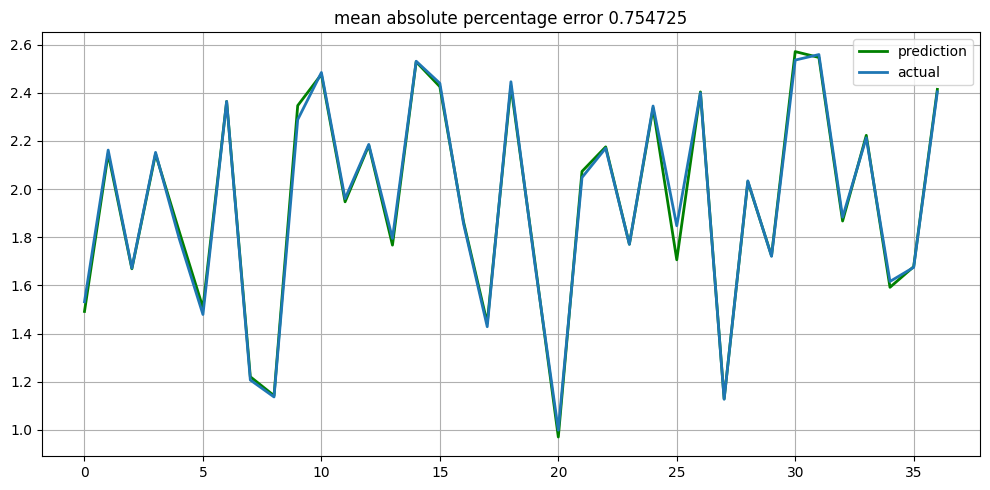

In [ ]:
# checking the performance of model
# function to plot model performance
def plotmodelresult(model, x_train=x_train, x_test=x_test, plot_intervals=False):

  # plot model vs fact values

   prediction = model.predict(x_test)

   plt.figure(figsize=(10,5))
   plt.plot(prediction, 'g', label='prediction', linewidth=2.0)
   plt.plot(y_test,label='actual',linewidth=2.0)

   plt.title('mean absolute percentage error {0:2f}'.format(mape))
   plt.legend(loc='best')
   plt.tight_layout()
   plt.grid(True);

plotmodelresult(lasso_regressor, plot_intervals=True)

# ML Model 4
Elastic Regression With Cross validation

In [ ]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(x_train,y_train)


ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(x_train,y_train)

0.69782444488914

In [ ]:
y_pred_en = elasticnet.predict(x_test)

In [ ]:
mse = mean_squared_error(10**(y_test),10**(y_pred_en))
print('mse :',mse)

mae = mean_absolute_error(10**(y_test),10**(y_pred_en))
print('mae:',mae)

rmse = np.sqrt(mse)
print('rmse:',rmse)

mape = mean_absolute_percentage_error(10**(y_test),10**(y_pred_en))
print('mape:',mape)

r2 = r2_score(10**(y_test),10**(y_pred_en))
print('r2 :',r2)

mse : 8197.99047153842
mae: 60.57719531454027
rmse: 90.54275493676134
mape: 0.4483213752127475
r2 : 0.2716718645023901


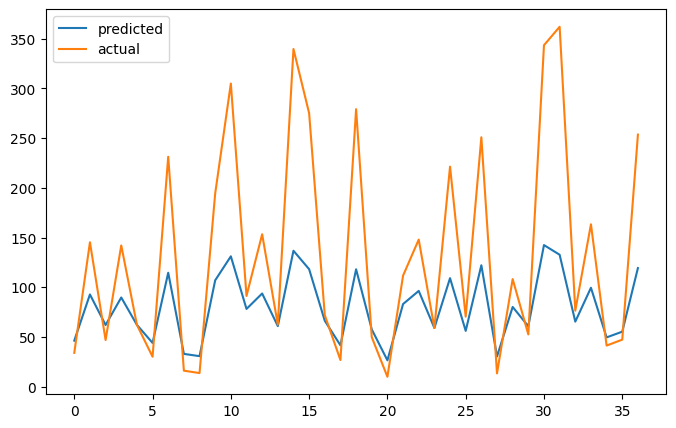

In [ ]:
# function to plot model performance
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_en))
plt.plot(10**(np.array(y_test)))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

elastic_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=3)

# Fit the Algorithm
elastic_regressor.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [ ]:
print('The best fit alpha value is found out to be :',elastic_regressor.best_params_)
print('\nUsing', elastic_regressor.best_params_,'the negative mean squared error is :',elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using {'alpha': 1e-15} the negative mean squared error is : -0.0011984680768812388


In [ ]:
e_mse = mean_squared_error(10**(y_test),10**(y_pred_elastic))
print('mse :',e_mse)

e_mae = mean_absolute_error(10**(y_test),10**(y_pred_elastic))
print('mae:',e_mae)

e_rmse = np.sqrt(e_mse)
print('rmse:',e_rmse)

e_mape = mean_absolute_percentage_error(10**(y_test),10**(y_pred_elastic))
print('mape:',e_mape)

e_r2 = r2_score(10**(y_test),10**(y_pred_elastic))
print('r2 :',e_r2)

mse : 69.31913882030766
mae: 4.729049907539072
rmse: 8.325811601297957
mape: 0.039410633418468344
r2 : 0.9938415299082654


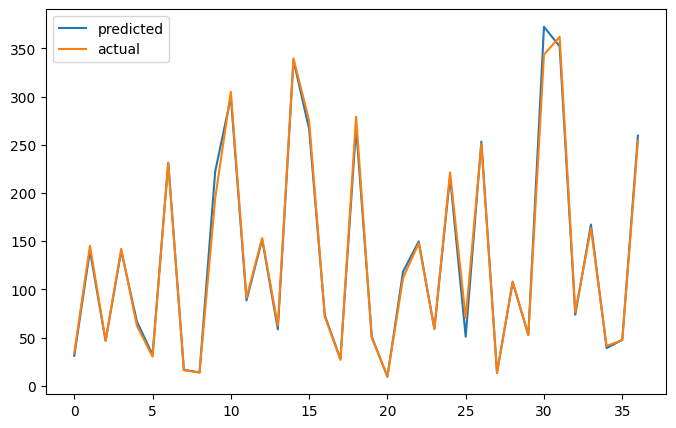

In [ ]:
# function to plot model performance
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
# check for homoscadacity
fig = px.scatter(x=10**(y_test), y=10**(y_pred_elastic),labels={'x':'Actaual values', 'y':'prediction'})
fig.add_shape(type='line',line=dict(dash='dash'),x0=y.min(),x1=y.max(),y1=y.max())
fig.show()

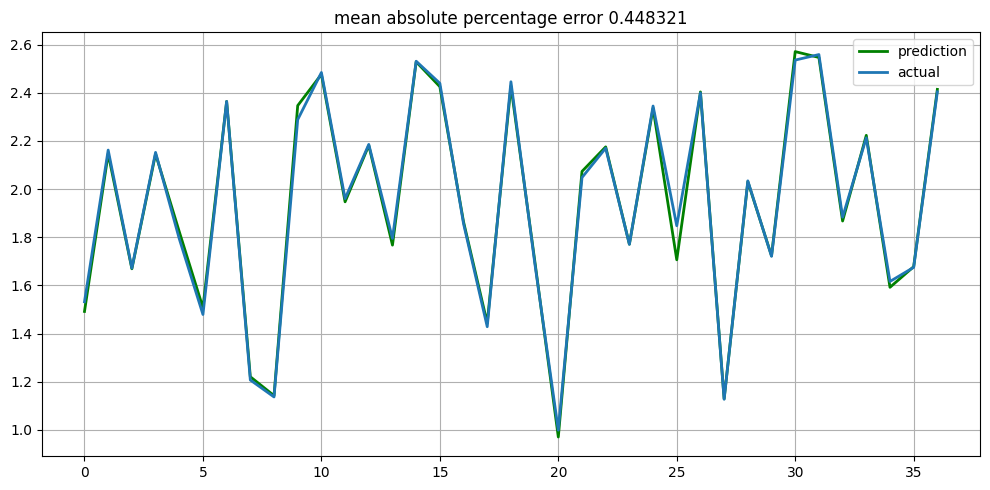

In [ ]:
# checking the performance of model
# function to plot model performance
def plotmodelresult(model, x_train=x_train, x_test=x_test, plot_intervals=False):

  # plot model vs fact values

   prediction = model.predict(x_test)

   plt.figure(figsize=(10,5))
   plt.plot(prediction, 'g', label='prediction', linewidth=2.0)
   plt.plot(y_test,label='actual',linewidth=2.0)

   plt.title('mean absolute percentage error {0:2f}'.format(mape))
   plt.legend(loc='best')
   plt.tight_layout()
   plt.grid(True);

plotmodelresult(elastic_regressor, plot_intervals=True)

**Evaluation Metric Summary**

In [ ]:
model_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'],'mae':[lr_mae,r_mae,l_mae,e_mae],'mse':[lr_mse,r_mse,l_mse,e_mse],'rmse':[lr_rmse,r_rmse,l_rmse,e_rmse],'r2_score':[lr_r2_score,r_r2,l_r2,e_r2],'mape':[lr_mape,r_mape,l_mape,e_mape]})

In [ ]:
model_report

,model,mae,mse,rmse,r2_score,mape
0,linear regression,4.746994,69.929765,6.663763,0.994667,0.041510
1,ridge regression,4.931169,70.907808,8.420677,0.993700,0.041510
2,lasso regression,4.729050,69.319139,8.325812,0.993842,0.039411
3,elastic net regression,4.729050,69.319139,8.325812,0.993842,0.039411


**ML Model 5**
**Randomforest regression**

In [ ]:
regressor = RandomForestRegressor()
grid_values = {'n_estimators':[100,150,200],'max_depth':[20,30,50,100]}
regressor = GridSearchCV(regressor, param_grid = grid_values, scoring ='roc_auc', cv=5)

# fit the object to train dataset
regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 30, 50, 100],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc')

In [ ]:
print(f'best parameters:,{regressor.best_params_}')

best parameters:,{'max_depth': 20, 'n_estimators': 100}


In [ ]:
train_preds = regressor.predict(x_train)
test_preds = regressor.predict(x_test)

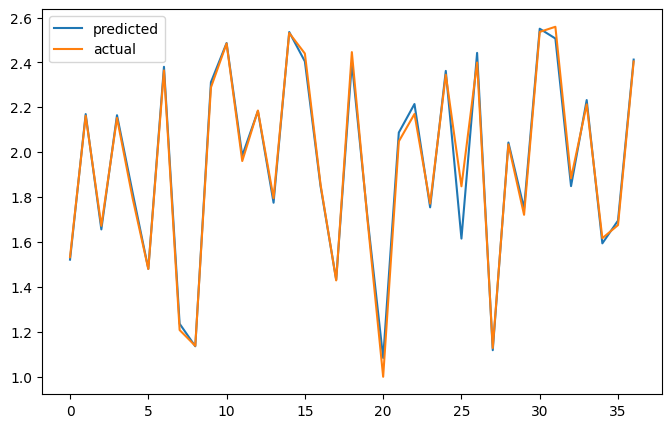

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(test_preds)
plt.plot(y_test)
plt.legend(['predicted','actual'])
plt.show()

# Which hyperparameter optimization technique have you used and why?


Grid search cross-validation (GridSearchCV) is a powerful technique for hyperparameter tuning. In your case, for predicting YES Bank stock closing prices, you could use GridSearchCV to optimize the hyperparameters of your machine learning model. Hyperparameters are parameters that are not directly learned within the estimator and are usually set prior to the training process. By using GridSearchCV, you can specify a grid of hyperparameters to explore, and the technique will systematically search through the grid, evaluating the model's performance using cross-validation. This helps you find the best combination of hyperparameters that yield the highest predictive accuracy or lowest error for your specific task. It's particularly useful when you have multiple hyperparameters to tune and want to find the optimal combination efficiently.

# Have you seen any improvement ? Note down the improvement with updates evaluation metric score chart.

Yes after using grid search cv technique each model's performance is improved.for example for lasso regression one of the evaluation metrix the mean absolute percentage error before cross validation is mape:0.754 but after using cross validation the same evaluation metrix for the test data became mape:0.0409

#Which Evaluation metrics did you consider for a positive buisness impact and why?

Since the problem is related to the regression so I will chooose the root mean square error evaluation metrics for possitive buisness impact. The root square mean error not only measure the difference between the actual and predicted values it also indicates the effect of large errors.

#Which ML model did you choose from the above created models as your final prediction model and why ?

From all the above models for lasso and elasticnet regressions the evaluation metrices for test data set are almost close to each other.So as per my understanding we can use elasticnet regressor for now.However it will be very early to pick a model at this point of time since the dataset is very small as we need more data so that the algorithms get more training data to learn more and improve their accuracy.

# **Conclusion**

Based on your project on predicting YES Bank stock closing prices, here's a suggested conclusion:

"In this project, we employed machine learning techniques to predict the closing prices of YES Bank stocks. We collected historical data on various features such as market trends, trading volume, and financial indicators to train our models. After preprocessing the data and engineering relevant features, we experimented with different machine learning algorithms, including linear regression, decision trees, and ensemble methods like random forests. Through rigorous evaluation using techniques like cross-validation and hyperparameter tuning with GridSearchCV, we identified the most suitable model architecture and hyperparameters for our task.

Our results demonstrate that Elasticnet regressor, trained on High, low, open, achieved mean absolute error 4.72 on our test set. This suggests that our model can effectively capture the underlying patterns in YES Bank stock prices and make reasonably accurate predictions. However, it's essential to acknowledge the inherent volatility and unpredictability of financial markets, which can impact the performance of any predictive model.

Furthermore, we recognize several avenues for future improvement. These include incorporating more granular data sources, exploring advanced machine learning techniques such as deep learning, and integrating external factors such as macroeconomic indicators or news sentiment analysis to enhance predictive accuracy.

Overall, this project underscores the potential of machine learning in forecasting stock prices and provides a solid foundation for further research and application in financial markets."

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***